In [1]:
import matplotlib.pyplot as plt
# 不加入以下这行则无法在jupyter显示图片
%matplotlib inline 
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read in the image and print out some stats
image = mpimg.imread('test.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

#import os  #cv2 only read one image, os can read a set of images from a folder
#images = os.listdir("test_images/")

# Grab the x and y size
ysize = image.shape[0]
xsize = image.shape[1]

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


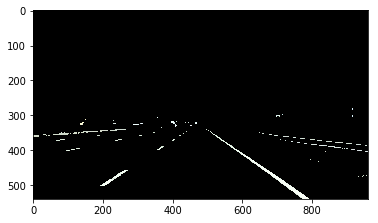

In [3]:
# Note: always make a copy rather than simply using "="
# 把mpimg读取的图片复制一份重命名再进行处理，这是一个很好的习惯！！！
color_select = np.copy(image)

# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
# 把RGB全部设置成255则图像全黑，全设置成0则图像正常化，200是提取出白色部分最好的选择
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Identify pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[color_thresholds] = [0,0,0]

# Display the image 在ipython是无法显示图片的，需要用imsave去另存图片
plt.imshow(color_select)
# Uncomment the following code if you are running the code locally and wish to save the image
# 处理后的图片在ipython是无法显示的，可以选择另存到文件夹
#mpimg.imsave("color-after.jpg", color_select)

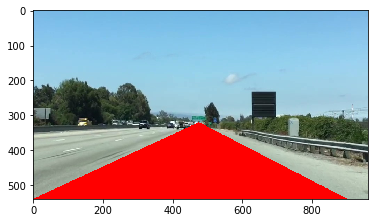

In [4]:
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
# 设定三角形的三个顶点
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
# 根据三角形的三个顶点连接三条边
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
# 画出三角形区域，xsize和ysize指图片的长度和高度，参照cell2理解
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
# RGB，如果想把三角形填充绿色或者蓝色则改动后两个数据，三组全为0颜色变黑，三组全为255颜色变白
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)
#mpimg.imsave("region-after.jpg", region_select)

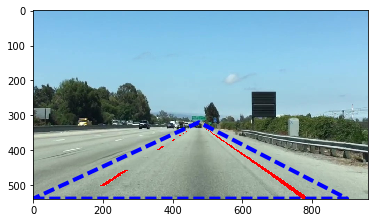

In [6]:
color_select_2 = np.copy(image)
line_image = np.copy(image)

# Mask color and region selection
# 把图片暗化并在三角形区域内的lines变白，注意这里是|，下面侧重三角形区域内则是&
color_select_2[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Find where image is both colored right and in the region
# Color pixels red where both color and region selections met
# 在三角形范围内找出lines并用红色标注
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display the image and show region and color selections
#plt.imshow(image)
# 设定x和y轴的顶点座标
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
# 不明白b--和1w=4是什么意思？？？#################################################################
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select_2)
plt.imshow(line_image)
#mpimg.imsave("color-after2.jpg", color_select_2)
#mpimg.imsave("line-after.jpg", line_image)

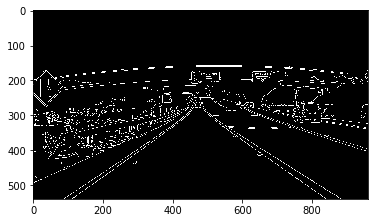

In [16]:
'''GaussianBlur灰化图像，然后Canny边缘化图像'''
import cv2  #bringing in OpenCV libraries 需要把cv2.pyd复制到anaconda2/lib/sitepackages/
image_2 = mpimg.imread('exit-ramp.jpg')

# Canny Edge Detection 先把image灰化gray，然后梯度gradient image，找出最亮区域bright point，刻画出边缘图形
gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY) #grayscale conversion

# You can choose the kernel_size for Gaussian smoothing to be any odd number
# A larger kernel_size implies averaging, or smoothing, over a larger area
# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
# 这一步骤会让图像smooth一点
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# canny function的公式 edges = cv2.Canny(gray, low_threshold, high_threshold)
# The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold
# and reject pixels below the low_threshold. 
# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

#plt.imshow(gray, cmap='gray')
#plt.imshow(blur_gray, cmap='gray')
#mpimg.imsave("gray-after.jpg", gray)
#pimg.imsave("blur_gray-after.jpg", blur_gray)
plt.imshow(edges, cmap='Greys_r')
#mpimg.imsave("edges-after.jpg", edges)

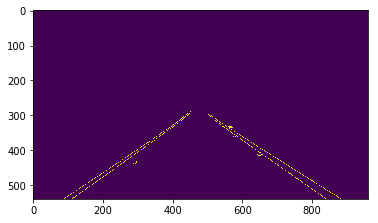

In [9]:
'''fillpoly和之前的polyfit一样都是选定一个多边形区域的，polyfit是三角形，fillpoly是多边形'''
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255
# This time we are defining a four sided polygon to mask
imshape = image.shape
# 要非常小心两个顶点的设置，否则会无法连接线
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
#height = image.shape[0], #width = image.shape[1], 这是一个好主意，设定高和宽的比例而不是固定数值
#vertices = np.array([[(0, imshape[0]), (image.shape[1]*3/8, image.shape[0]*5/8), (image.shape[1]*5/8, image.shape[0]*5/8), (imshape[1], imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

plt.imshow(masked_edges)
#mpimg.imsave("masked-after.jpg", masked_edges)

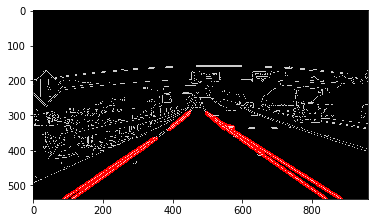

In [10]:
'''HoughLinesP和addWeighted将边缘化后的线条变成点，然后再转换成线'''
# Hough Transform: y=xm+b, 通过hough把image的line转化成point
# 如果image space是line的时候，hough space是point, 反之image是point则hough是line
# 两个hough的point形成两条交叉lines，交叉的lines交集的那个point所形成的line又必然经过hough points
# 公式 lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

line_image = np.copy(image)*0 #creating a blank to draw lines on， 注意这里的copy是有*0

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # rho and theta are the distance and angular resolution of our grid in Hough space
theta = np.pi/180
threshold = 15  # specifies the minimum number of votes(intersections in a given grid cell) needs to make it into the output
min_line_length = 40  # minimum length of a line (in pixels) that you will accept in the output
max_line_gap = 20  # maximum distance (in pixels) between segments that you will allow to be connected into a single line

# Run Hough on edge detected image，注意在这里要用masked_edges，否则会将多边形区域外的line也转换成point
# threshold越小，延长线颜色越清晰，但也越混乱, max_line_gap越大，虚线的延长就越大
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
# combo是把2张图叠加在一起，如果是把lines和image叠加，则显示原图并探测出lane lines
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 

plt.imshow(combo)
#mpimg.imsave("hough-after.jpg", combo)